In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
import matplotlib.pyplot as plt

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
!pip install opendatasets

In [ ]:

import opendatasets as od

dataset_url ='https://www.kaggle.com/datasets/marquis03/fruits-100'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khanaabidabdal
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/marquis03/fruits-100


100%|██████████| 627M/627M [00:11<00:00, 56.4MB/s]


In [ ]:
train_dir='/content/fruits-100/train'
test_dir='/content/fruits-100/val'

In [ ]:
import os
from pathlib import Path

# Define the train directory as a Path object
data_dir = Path('/content/fruits-100/train')


def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Walk through the train directory
walk_through_dir(data_dir)

import random
from PIL import Image

# Set seed
random.seed(2) # <- try changing this and see what happens

import random

# Get all image paths
image_path_list = list(data_dir.glob("**/*.jpg"))

# Get a random index
random_index = random.randint(4, len(image_path_list) - 1)

# Get the image at the random index
random_image_path = image_path_list[random_index]

# 4. Open image
img = Image.open(random_image_path)

There are 100 directories and 1 images in '/content/fruits-100/train'.
There are 0 directories and 400 images in '/content/fruits-100/train/acai'.
There are 0 directories and 400 images in '/content/fruits-100/train/apple'.
There are 0 directories and 400 images in '/content/fruits-100/train/barberry'.
There are 0 directories and 400 images in '/content/fruits-100/train/ugli_fruit'.
There are 0 directories and 400 images in '/content/fruits-100/train/coconut'.
There are 0 directories and 400 images in '/content/fruits-100/train/barbadine'.
There are 0 directories and 400 images in '/content/fruits-100/train/mabolo'.
There are 0 directories and 400 images in '/content/fruits-100/train/camu_camu'.
There are 0 directories and 400 images in '/content/fruits-100/train/mountain_soursop'.
There are 0 directories and 400 images in '/content/fruits-100/train/taxus_baccata'.
There are 0 directories and 400 images in '/content/fruits-100/train/fig'.
There are 0 directories and 400 images in '/con

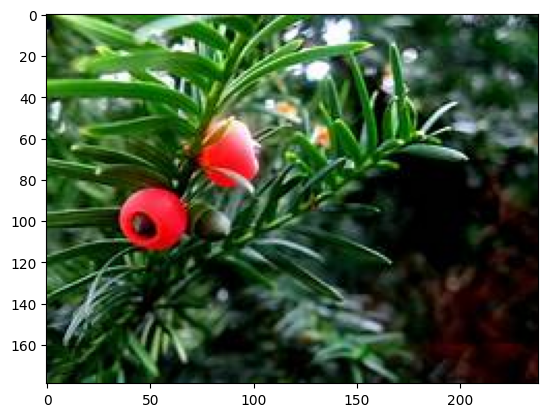

In [ ]:
plt.imshow(img);

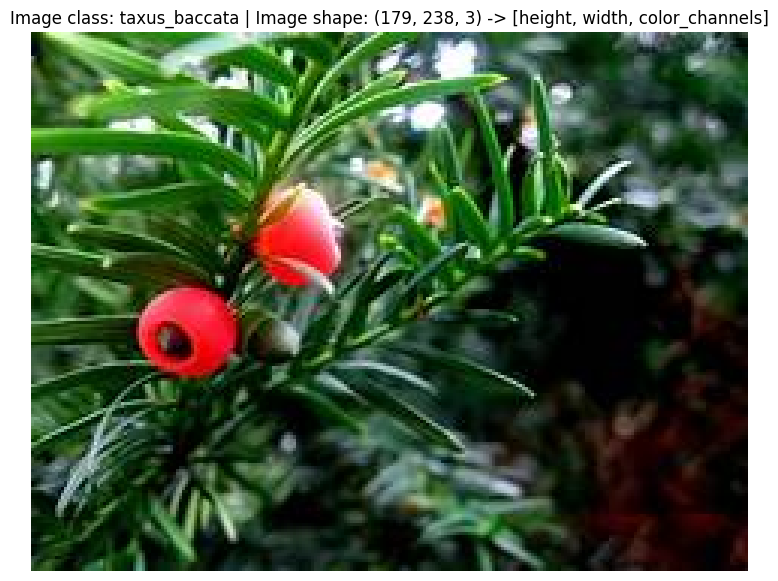

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)
image_class = random_image_path.parent.stem

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
import torchvision.models as models

weights=torchvision.models.ResNet50_Weights.DEFAULT
weights

ResNet50_Weights.IMAGENET1K_V2

In [ ]:
import torchvision.transforms as T
from torchvision.transforms import TrivialAugmentWide

weights = torchvision.models.ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
print(auto_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=os.path.join(train_dir), # target folder of images
                                  transform=auto_transforms, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(os.path.join(test_dir),
                                 transform=auto_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 40000
    Root location: /content/fruits-100/train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 5000
    Root location: /content/fruits-100/val
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[232]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BILINEAR
           )


In [ ]:
class_names=train_data.classes
class_names[:10]

['abiu',
 'acai',
 'acerola',
 'ackee',
 'ambarella',
 'apple',
 'apricot',
 'avocado',
 'banana',
 'barbadine']

In [ ]:
from torch.utils.data import dataloader
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=32,
                            num_workers=1,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=32,
                           num_workers=1,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x790618189f30>,
 <torch.utils.data.dataloader.DataLoader at 0x7906181892a0>)

In [ ]:
import torchvision
weights=torchvision.models.ResNet50_Weights.DEFAULT
model = torchvision.models.resnet50(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 179MB/s]


In [ ]:
!pip install -q torchinfo
from torchinfo import summary

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 1000]           --                   True
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   128                  True
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     4,096                True
│    │    └─BatchN

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.fc=nn.Sequential(
    torch.nn.Linear(in_features=2048,
                    out_features=1000),
    torch.nn.Dropout(p=0.2,inplace=True),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=1000,
                    out_features=500),
    torch.nn.Dropout(),
    nn.ReLU(),

    torch.nn.Linear(in_features=500,
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [ ]:
# # Do a summary *after* freezing the features and changing the output classifier layer (uncomment for actual output)
summary(model,
        input_size=(32, 3, 224, 224), # make sure this is "input_size", not "input_shape" (batch_size, color_channels, height, width)
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [32, 3, 224, 224]    [32, 100]            --                   Partial
├─Conv2d (conv1)                         [32, 3, 224, 224]    [32, 64, 112, 112]   (9,408)              False
├─BatchNorm2d (bn1)                      [32, 64, 112, 112]   [32, 64, 112, 112]   (128)                False
├─ReLU (relu)                            [32, 64, 112, 112]   [32, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112]   [32, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    └─Bottleneck (0)                    [32, 64, 56, 56]     [32, 256, 56, 56]    --                   False
│    │    └─Conv2d (conv1)               [32, 64, 56, 56]     [32, 64, 56, 56]     (4,096)              False
│    │    

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS =20

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.3958 | train_acc: 0.2882 | test_loss: 2.3592 | test_acc: 0.5754
Epoch: 2 | train_loss: 2.3716 | train_acc: 0.5348 | test_loss: 2.0237 | test_acc: 0.6463
Epoch: 3 | train_loss: 2.1063 | train_acc: 0.6144 | test_loss: 1.8707 | test_acc: 0.6849
Epoch: 4 | train_loss: 1.9565 | train_acc: 0.6582 | test_loss: 1.8073 | test_acc: 0.7070
Epoch: 5 | train_loss: 1.8581 | train_acc: 0.6922 | test_loss: 1.7331 | test_acc: 0.7205
Epoch: 6 | train_loss: 1.7719 | train_acc: 0.7193 | test_loss: 1.6879 | test_acc: 0.7410
Epoch: 7 | train_loss: 1.7127 | train_acc: 0.7375 | test_loss: 1.6572 | test_acc: 0.7446
Epoch: 8 | train_loss: 1.6640 | train_acc: 0.7533 | test_loss: 1.6340 | test_acc: 0.7524
Epoch: 9 | train_loss: 1.6155 | train_acc: 0.7710 | test_loss: 1.6194 | test_acc: 0.7611
Epoch: 10 | train_loss: 1.5764 | train_acc: 0.7862 | test_loss: 1.6202 | test_acc: 0.7605
Epoch: 11 | train_loss: 1.5370 | train_acc: 0.7980 | test_loss: 1.5788 | test_acc: 0.7711
Epoch: 12 | train_l

In [ ]:
import typing
from typing import Dict, List

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

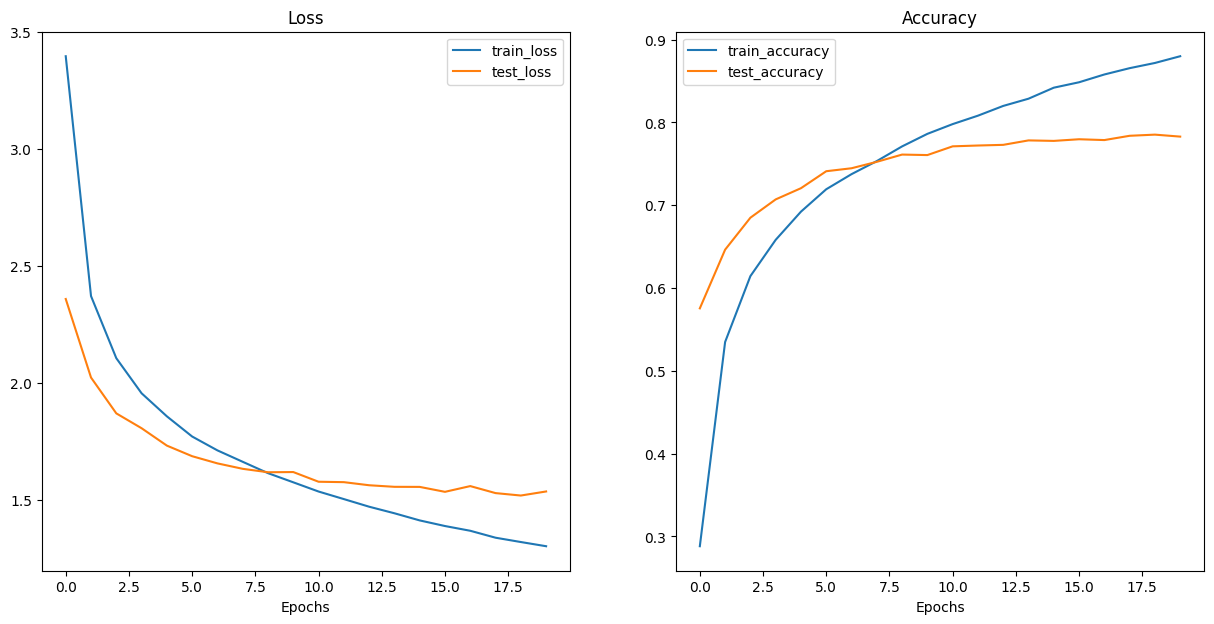

In [ ]:
plot_loss_curves(results)

In [ ]:
custom_image_path='/content/Apple.jpg'

In [ ]:
import torchvision

custom_image_uint8=torchvision.io.read_image(str(custom_image_path))

print(f"Custom image tensor:\n{custom_image_uint8}")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image datatype: {custom_image_uint8.dtype}")

Custom image tensor:
tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]],

        [[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)
Custom image shape: torch.Size([3, 3000, 3000])

Custom image data

In [ ]:
custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

custom_image=custom_image/255

print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

Custom image shape: torch.Size([3, 3000, 3000])

Custom image dtype: torch.float32


In [ ]:
custom_image_transform=weights.transforms()

custom_image_transformed=custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 3000, 3000])
New shape: torch.Size([3, 224, 224])


In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

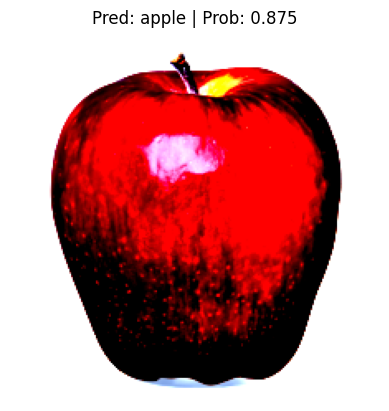

In [ ]:
pred_and_plot_image(model=model,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [ ]:
cs='/content/Grapes.jpg'

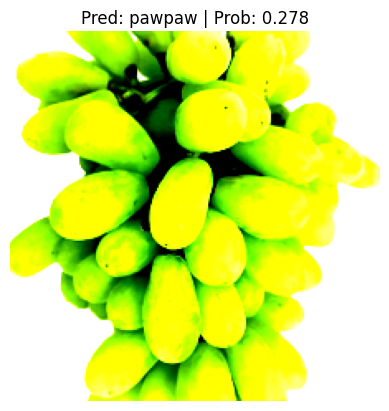

In [ ]:
pred_and_plot_image(model=model,
                    image_path=cs,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [ ]:
pineapple='/content/pineapple-909097_640.jpg'

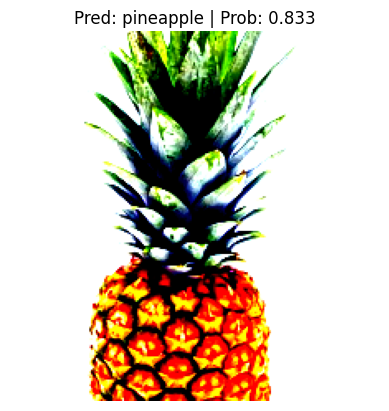

In [ ]:
pred_and_plot_image(model=model,
                    image_path=pineapple,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [ ]:
mango='/content/yellow-mango.jpeg'

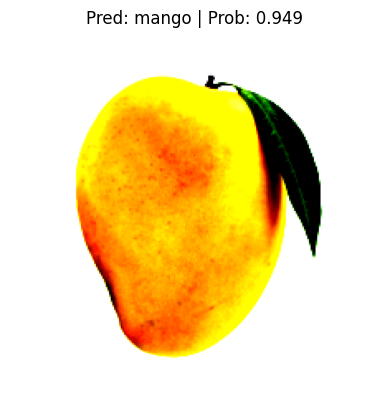

In [ ]:
pred_and_plot_image(model=model,
                    image_path=mango,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

In [ ]:
try :
  import gradio as gd
except :
  !pip install gradio
  import gradio as gd

print(f"Gradio version: {gd.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.0 MB/s 

In [ ]:
model.to('cpu')
next(iter(model.parameters())).device

device(type='cpu')

In [ ]:
from typing import Tuple, Dict

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = auto_transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    model.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(model(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

In [ ]:
test_dir='/content/fruits-100/val'

In [ ]:
import random
from PIL import Image

# Get a list of all test image filepaths
test_data_paths = list(Path(test_dir).glob("*/*.jpg"))

# Randomly select a test image path
random_image_path = random.sample(test_data_paths, k=1)[0]

# Open the target image
image = Image.open(random_image_path)
print(f"[INFO] Predicting on image at path: {random_image_path}\n")

# Predict on the target image and print out the outputs
pred_dict, pred_time = predict(img=image)
print(f"Prediction label and probability dictionary: \n{pred_dict}")
print(f"Prediction time: {pred_time} seconds")

[INFO] Predicting on image at path: /content/fruits-100/val/longan/602.jpg

Prediction label and probability dictionary: 
{'abiu': 0.0013034456642344594, 'acai': 0.0005259169265627861, 'acerola': 3.696229759952985e-05, 'ackee': 0.0012055833358317614, 'ambarella': 0.0026798509061336517, 'apple': 3.341571937198751e-05, 'apricot': 0.0037058235611766577, 'avocado': 9.173138096230105e-05, 'banana': 0.00039691574056632817, 'barbadine': 4.050171992275864e-05, 'barberry': 0.00096518435748294, 'betel_nut': 0.002824589377269149, 'bitter_gourd': 6.0476435464806855e-05, 'black_berry': 0.0008500040275976062, 'black_mullberry': 0.00036738842027261853, 'brazil_nut': 0.0016591971507295966, 'camu_camu': 0.00042641584877856076, 'cashew': 0.00011358813935657963, 'cempedak': 0.000319375452818349, 'chenet': 0.0015238416381180286, 'cherimoya': 0.000936410331632942, 'chico': 0.030568957328796387, 'chokeberry': 0.0028338709380477667, 'cluster_fig': 0.0022050864063203335, 'coconut': 0.003297463059425354, 'corn

In [ ]:
example_list = [[str(filepath)] for filepath in random.sample(test_data_paths, k=3)]
example_list

[['/content/fruits-100/val/oil_palm/814.jpg'],
 ['/content/fruits-100/val/brazil_nut/337.jpg'],
 ['/content/fruits-100/val/sugar_apple/233.jpg']]

In [ ]:
import gradio as gr

# Create title, description and article strings
title = "Fruitify : Know Your Fruits"
description = "An ResNet50 feature extractor computer vision model to classify images of different fruits such as 'Mango', 'Apple', 'PineApple', 'Mango', etc. It can classify the 100 different fruits with accuracy of upto 80%"
article = "Created at [Fruitify]."

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch(debug=False, # print errors locally?
            share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2652ae06759e348e45.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import shutil
from pathlib import Path

fruitify_demo_path=Path('demos/fruitify')

if fruitify_demo_path.exists():
  shutil.rmtree(fruitify_demo_path)
  fruitify_demo_path.mkdir(parents=True,
                           exist_ok=True)

else:
  fruitify_demo_path.mkdir(parents=True,
                           exist_ok=True)

!ls demo/fruitify/

ls: cannot access 'demo/fruitify/': No such file or directory


In [ ]:
import shutil
from pathlib import Path

# 1. Create an examples directory
fruitify_examples_path = fruitify_demo_path / "examples"
fruitify_examples_path.mkdir(parents=True, exist_ok=True)

# 2. Collect three random test dataset image paths
fruitify_examples = [Path('/content/fruits-100/val/apple/234.jpg'),
                            Path('/content/fruits-100/val/cashew/227.jpg'),
                            Path('/content/fruits-100/val/mango/849.jpg')]

# 3. Copy the three random images to the examples directory
for example in fruitify_examples:
    destination = fruitify_examples_path / example.name
    print(f"[INFO] Copying {example} to {destination}")
    shutil.copy2(src=example, dst=destination)

[INFO] Copying /content/fruits-100/val/apple/234.jpg to demos/fruitify/examples/234.jpg
[INFO] Copying /content/fruits-100/val/cashew/227.jpg to demos/fruitify/examples/227.jpg
[INFO] Copying /content/fruits-100/val/mango/849.jpg to demos/fruitify/examples/849.jpg


In [ ]:
import os

example_list = [["examples/" + example] for example in os.listdir(fruitify_examples_path)]
example_list

[['examples/227.jpg'], ['examples/234.jpg'], ['examples/849.jpg']]

In [ ]:
from pathlib import Path

Model_Path=Path('Models')
Model_Path.mkdir(parents=True,
                 exist_ok=True)

Model_Name='Resnet_Model.pth'
Model_Save_Path=Model_Path/Model_Name

print(f"Saving Model to : {Model_Save_Path}")
torch.save(obj=model.state_dict(),
           f=Model_Save_Path)

Saving Model to : Models/Resnet_Model.pth


In [ ]:
import shutil

model_fruitify_model_path="/content/Models/Resnet_Model.pth"


model_fruitify_model_destination = fruitify_demo_path / model_fruitify_model_path.split("/")[1]

try:
    print(f"[INFO] Attempting to move {model_fruitify_model_path} to {model_fruitify_model_destination}")

    # Move the model
    shutil.move(src=model_fruitify_model_path,
                dst=model_fruitify_model_destination)

    print(f"[INFO] Model move complete.")

# If the model has already been moved, check if it exists
except:
    print(f"[INFO] No model found at {model_fruitify_model_path}, perhaps its already been moved?")
    print(f"[INFO] Model exists at {model_fruitify_model_destination}: {model_fruitify_model_destination.exists()}")


[INFO] Attempting to move /content/Models/Resnet_Model.pth to demos/fruitify/content
[INFO] Model move complete.


In [ ]:
fruitify_class_names=train_data.classes
fruitify_class_names[:10]

['abiu',
 'acai',
 'acerola',
 'ackee',
 'ambarella',
 'apple',
 'apricot',
 'avocado',
 'banana',
 'barbadine']

In [ ]:
fruitify_class_names_path=fruitify_demo_path/"class_names.txt"

with open(fruitify_class_names_path,'w') as f:
  print(f"[INFO] Saving Fruitify Class Names to {fruitify_class_names_path}")
  f.write("\n".join(fruitify_class_names))

[INFO] Saving Fruitify Class Names to demos/fruitify/class_names.txt


In [ ]:
with open(fruitify_class_names_path, "r") as f:
    fruitify_class_names_loaded = [food.strip() for food in  f.readlines()]


fruitify_class_names_loaded[:5]


['abiu', 'acai', 'acerola', 'ackee', 'ambarella']

In [ ]:
%%writefile demos/fruitify/model.py

import torch
import torchvision
from torch import nn

def create_model(num_classes:int=100,
                 seed:int=42):
  Weights=torchvision.models.ResNet50_Weights.DEFAULT
  transforms=Weights.transforms()
  model=torchvision.models.resnet50(weights=Weights)


  for param in model.parameters():
    param.require_grad=False

    torch.manual_seed(42)
    model.fc=nn.Sequential(
    torch.nn.Linear(in_features=2048,
                    out_features=1000),
    torch.nn.Dropout(p=0.2,inplace=True),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=1000,
                    out_features=500),
    torch.nn.Dropout(),
    nn.ReLU(),

    torch.nn.Linear(in_features=500,
                    out_features=num_classes, # same number of output units as our number of classes
                    bias=True))

    return model,transforms

Writing demos/fruitify/model.py


In [ ]:
%%writefile demos/fruitify/app.py

import gradio as gr
import os
import torch

from model import create_model
from timeit import default_timer as timer
from typing import Tuple,Dict

with open("class_names.txt", "r") as f: # reading them in from class_names.txt
    class_names = [food_name.strip() for food_name in  f.readlines()]



model,transforms=create_model(
    num_classes=100,
)

model.load_state_dict(
    torch.load(
        f="Resnet_Model.pth",
        map_location=torch.device("cpu")
    )
)

def predict(img) -> Tuple[Dict, float]:
    """Transforms and performs a prediction on img and returns prediction and time taken.
    """
    # Start the timer
    start_time = timer()

    # Transform the target image and add a batch dimension
    img = transforms(img).unsqueeze(0)

    # Put model into evaluation mode and turn on inference mode
    model.eval()
    with torch.inference_mode():
        # Pass the transformed image through the model and turn the prediction logits into prediction probabilities
        pred_probs = torch.softmax(model(img), dim=1)

    # Create a prediction label and prediction probability dictionary for each prediction class (this is the required format for Gradio's output parameter)
    pred_labels_and_probs = {class_names[i]: float(pred_probs[0][i]) for i in range(len(class_names))}

    # Calculate the prediction time
    pred_time = round(timer() - start_time, 5)

    # Return the prediction dictionary and prediction time
    return pred_labels_and_probs, pred_time

import gradio as gr

# Create title, description and article strings
title = "Fruitify : Know Your Fruits"
description = "A ResNet50 feature extractor computer vision model to classify images of different fruits such as 'Mango', 'Apple', 'PineApple', 'Mango', etc. It can classify the 100 different fruits with accuracy of upto 80%"
article = "Created at [Fruitify]."

example_list = [["examples/" + example] for example in os.listdir("examples")]

# Create the Gradio demo
demo = gr.Interface(fn=predict, # mapping function from input to output
                    inputs=gr.Image(type="pil"), # what are the inputs?
                    outputs=[gr.Label(num_top_classes=3, label="Predictions"), # what are the outputs?
                             gr.Number(label="Prediction time (s)")], # our fn has two outputs, therefore we have two outputs
                    examples=example_list,
                    title=title,
                    description=description,
                    article=article)

# Launch the demo!
demo.launch()


Writing demos/fruitify/app.py


In [ ]:
%%writefile demos/fruitify/requirements.txt
torch==2.3.0
torchvision==0.18.0
gradio==4.32.2

Writing demos/fruitify/requirements.txt


In [ ]:
!ls demos/fruitify

app.py	class_names.txt  content  examples  model.py  requirements.txt


In [ ]:
# Change into and then zip the foodvision_mini folder but exclude certain files
!cd demos/fruitify && zip -r ../fruitify.zip * -x "*.pyc" "*.ipynb" "*__pycache__*" "*ipynb_checkpoints*"

# Download the zipped FoodVision Mini app (if running in Google Colab)
try:
    from google.colab import files
    files.download("demos/fruitify.zip")
except:
    print("Not running in Google Colab, can't use google.colab.files.download(), please manually download.")

  adding: app.py (deflated 57%)
  adding: class_names.txt (deflated 47%)
  adding: content (deflated 7%)
  adding: examples/ (stored 0%)
  adding: examples/227.jpg (deflated 0%)
  adding: examples/234.jpg (deflated 0%)
  adding: examples/849.jpg (deflated 2%)
  adding: model.py (deflated 58%)
  adding: requirements.txt (deflated 4%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>